## Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns                                # $:~ conda install seaborn
import scipy.stats as stats
import scipy.optimize as opt

from matplotlib.gridspec import GridSpec

%matplotlib inline

## Style settings

In [2]:
sns.set_style('white')
sns.set_context('paper')
sns.set_palette(sns.dark_palette('blue'))

matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.default'] = 'rm'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

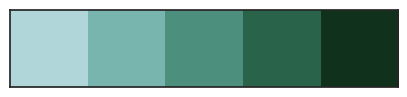

In [3]:
p = sns.cubehelix_palette(n_colors=5, start=2.0, rot=.2, gamma=1, hue=.8, light=.8, dark=.15)
sns.palplot(p)
sns.set_palette(p)

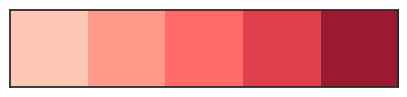

In [74]:
p2 = sns.cubehelix_palette(n_colors=5, start=0.8, rot=.1, gamma=.7, hue=2, light=.8, dark=.15)
sns.palplot(p2)

In [76]:
# colorblind people don't need to see this :p

## Load Data

In [5]:
# DO NOT put data into github folders!

gdpath = os.path.expanduser('~/Google Drive/Bas Zahy Gianni - Games')

In [6]:
L = pd.read_csv(os.path.join(gdpath, 'Data/3_lrn/Clean/_summaries/all_games_all_fields.csv'))
A = pd.read_csv(os.path.join(gdpath, 'Data/3_lrn/Clean/_summaries/all_afc2s_all_fields.csv'))

/Users/gianni/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
A['correct'] = 1
A.loc[(A.aval > A.bval) & (A.response == A.b), 'correct'] = 0
A.loc[(A.bval > A.aval) & (A.response == A.a), 'correct'] = 0
T = A.loc[A.aval != A.bval, :]

# Performance

In [8]:
ranks = pd.read_csv(os.path.join(gdpath, 'Analysis/3_lrn/ratings_learn.csv'))
R = ranks.loc[ranks['Subject'] >= 0, :]
for s in R.Subject.unique():
    _r = R.loc[R.Subject == s, :]
    _g = _r.sort_values('Session').games.cumsum()
    
    R.loc[_g.index, 'games td'] = _g.values
R = R.sort_values(['Subject', 'Session'])

/Users/gianni/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/gianni/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
for s in R.Subject.unique():
    for ss in R.Session.unique():
        R.loc[(R.Subject==s)&(R.Session==ss), 'mean rt'] = L.loc[(L.subject==s)&(L.session==ss), 'rt'].mean()
        if ss%2 == 0:
            R.loc[(R.Subject==s)&(R.Session==ss), 'afc score'] = T.loc[(T.subject==s)&(T.session==ss), 'correct'].mean()

,Rank,Name,Subject,Session,Elo,+,-,games,score,oppo.,draws,games td,mean rt,afc score
158,159,sub00sess00,0,0,-194,145,148,19,45%,-141,16%,19.0,5798.176136,0.642857
176,177,sub00sess01,0,1,-359,87,93,62,35%,-238,3%,81.0,2681.435417,NaN
174,175,sub00sess02,0,2,-305,116,120,33,44%,-251,3%,114.0,1824.660650,0.434783
169,170,sub00sess03,0,3,-259,92,93,55,47%,-236,4%,169.0,2253.663366,NaN
170,171,sub00sess04,0,4,-268,136,141,24,44%,-220,4%,193.0,1838.354067,0.380952


In [31]:
stats.linregress(np.log(d['mean rt']), d['afc score'])

LinregressResult(slope=0.04720868446624063, intercept=0.14254068102462686, rvalue=0.1789651649317763, pvalue=0.091462140981834708, stderr=0.02766580654699834)

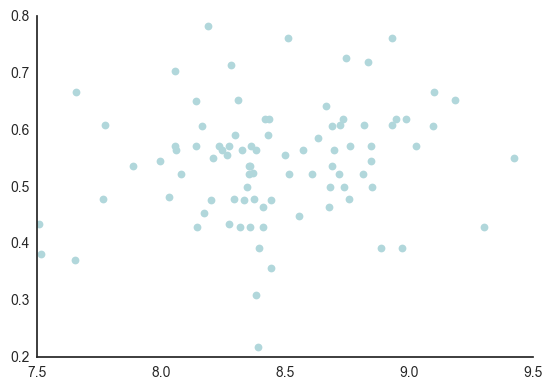

In [29]:
plt.plot(np.log(R['mean rt']), R['afc score'], linestyle='none', marker='o')
sns.despine()

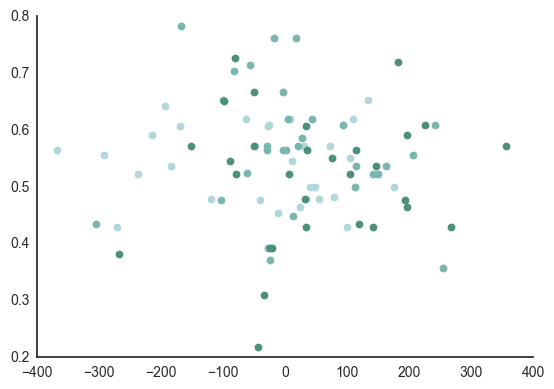

In [35]:
fig, axes = plt.subplots(1, 1)

d = R.loc[pd.notnull(R['afc score'])]
# for s in d.Subject.unique():
#     dd = d.loc[d.Subject==s, :]
#     axes.plot(dd['Elo'], dd['afc score'], color='grey')
    
for s in d.Session.unique():
    dd = d.loc[d.Session==s, :]
    axes.plot(dd['Elo'], dd['afc score'], marker='o', linestyle='none')
    
sns.despine()

0.540791224157
0.56991140673
0.514795922385
0.5407912241570413
0.5699114067304972
0.514795922385128


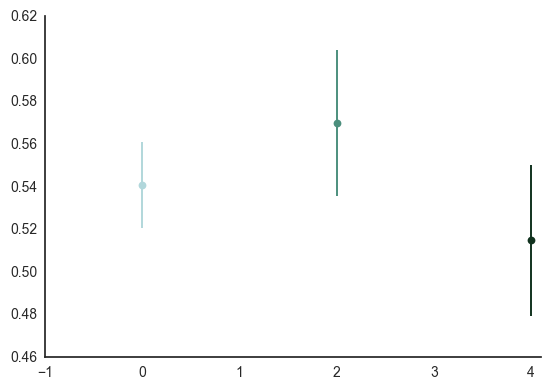

In [44]:
fig, axes = plt.subplots(1, 1)

for i in [0, 2, 4]:
    dd = d.loc[d.Session==i, 'afc score']
    mvs = stats.bayes_mvs(dd.values)
    print(mvs[0][0])
    axes.plot(i, mvs[0][0], marker='o', markerfacecolor=p[i])
    axes.errorbar(i, y=mvs[0][0], yerr=mvs[0][0]-mvs[0][1][0], color=p[i])
    
plt.setp(axes, xlim=[-1, 4.1])
sns.despine()

print(d.loc[d.Session==0, 'afc score'].mean())
print(d.loc[d.Session==2, 'afc score'].mean())
print(d.loc[d.Session==4, 'afc score'].mean())


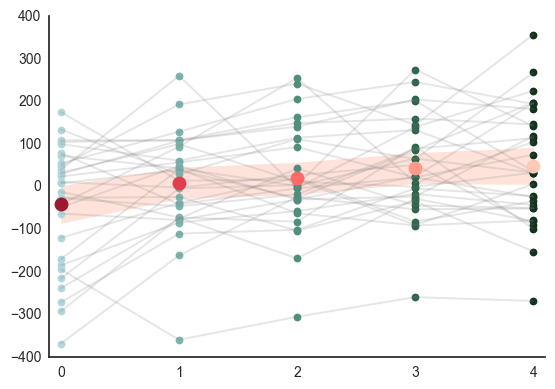

In [75]:
fig, axes = plt.subplots(1, 1)
mvs = []
for sess in np.arange(5):
    d = R.loc[R.Session == sess, :]
    mvs.append(stats.bayes_mvs(d['Elo']))
    axes.plot(d['Session'], d['Elo'], marker='o', linestyle='none', color=p.as_hex()[sess])
    axes.plot(sess, mvs[sess][0][0], color=p2.as_hex()[::-1][sess], marker='o', markersize=10, zorder=51)

axes.fill_between(
    x=[0, 1, 2, 3, 4], y1=[m[0][1][0] for m in mvs], y2=[m[0][1][1] for m in mvs],
    color=p2[0], alpha=.5
)
    
for sub in R.Subject.unique():
    d = R.loc[R.Subject == sub, :]
    axes.plot(d['Session'], d['Elo'], color='grey', alpha=.2)

sns.despine()

plt.setp(axes, xticks=np.arange(-1, 6, 1), xlim=[-.1, 4.1]);

In [164]:
mvs[0][1]

(-85.081425171970309, 2.0814251719702881)

LinregressResult(slope=0.020454933289512769, intercept=13.847233426662706, rvalue=0.0094500152913489857, pvalue=0.90862510554643661, stderr=0.17791612282026364)


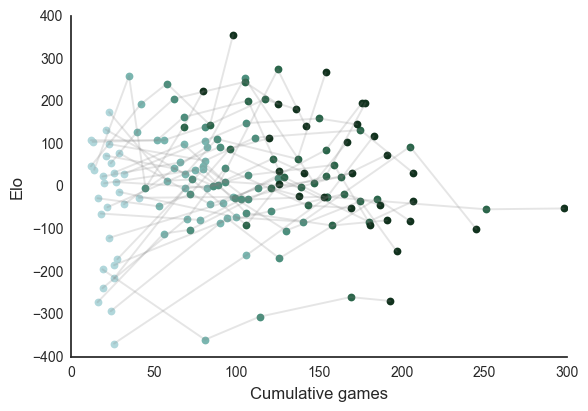

In [115]:
fig, axes = plt.subplots(1, 1)

for sess in np.arange(5):
    d = R.loc[R.Session == sess, :]
    axes.plot(d['games td'], d['Elo'], marker='o', linestyle='none')
for sub in R.Subject.unique():
    d = R.loc[R.Subject == sub, :]
    axes.plot(d['games td'], d['Elo'], color='grey', alpha=.2)
    
plt.setp(axes, xlabel='Cumulative games', ylabel='Elo')
sns.despine()

print(stats.linregress(R['games td'], R['Elo']))

(Mean(statistic=90.433333333333337, minmax=(36.739652745507321, 144.12701392115935)), Variance(statistic=22208.420987654314, minmax=(13114.553573170651, 37366.778067045416)), Std_dev(statistic=147.6517209916087, minmax=(114.5187913539549, 193.30488371235072)))
LinregressResult(slope=-0.24088205960760156, intercept=131.03801918118805, rvalue=-0.072806849135339372, pvalue=0.70220705762636881, stderr=0.62358991061094893)


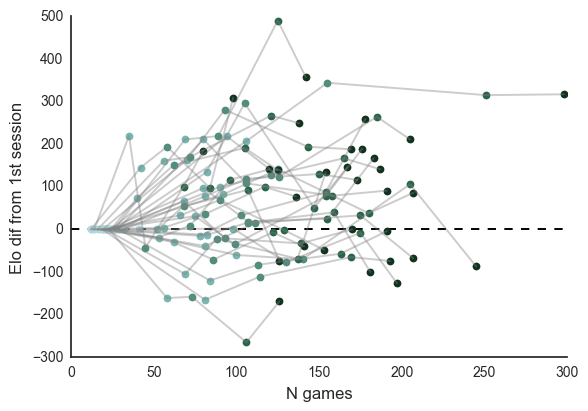

In [138]:
fig, axes = plt.subplots(1, 1)

for s in R.Subject.unique():
    R.loc[R.Subject == s, 'first elo'] = R.loc[R.Subject == s, 'Elo'].values[0]
R['elo dif'] = R['Elo'] - R['first elo']
E = R.copy() #R.loc[R.Session == 4, :]
e = E.loc[E.Session==4, :]
print(stats.bayes_mvs(e['elo dif'].values, alpha=.95))
print(stats.linregress(e['games td'], e['elo dif']))

axes.plot((0, 300), (0, 0), color='black', linestyle='--')

for s in np.arange(5):
    e = E.loc[E.Session==s]
    axes.plot(e['games td'], e['elo dif'], linestyle='none', marker='o')
for s in E.Subject.unique():
    e = E.loc[E.Subject==s]
    axes.plot(e['games td'], e['elo dif'], color='grey', alpha=.4)
    

sns.despine()
plt.setp(axes, xlabel='N games', ylabel='Elo dif from 1st session');

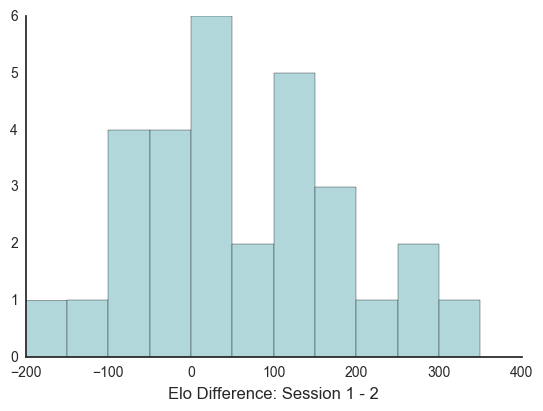

In [98]:
plt.hist(E.values, bins = np.arange(-200, 400, 50))
plt.xlabel('Elo Difference: Session 1 - 2')
sns.despine()

LinregressResult(slope=0.0020352945299456863, intercept=80.630793288200337, rvalue=0.023285242663161853, pvalue=0.90279167989006626, stderr=0.016513902334489707)


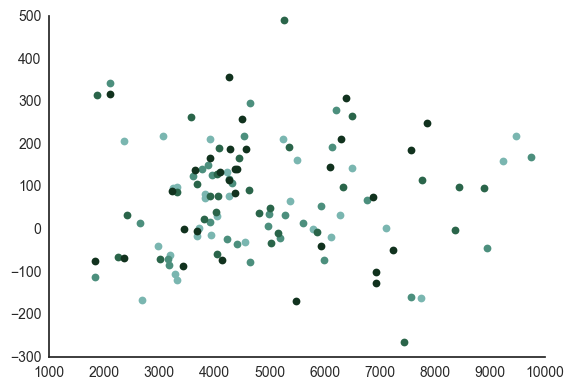

In [239]:
fig, axes = plt.subplots(1, 1)

for sess in np.arange(1, 5, 1):
    t = R.loc[R.Session == sess]
    plt.plot(t['mean rt'], t['elo dif'], marker='o', linestyle='none', color=p[sess])
sns.despine()
print(stats.linregress(t['mean rt'], t['elo dif']))

LinregressResult(slope=-116.54065570860232, intercept=5198.4806448593308, rvalue=-0.0861625109328822, pvalue=0.29445701966374127, stderr=110.76693603932858)

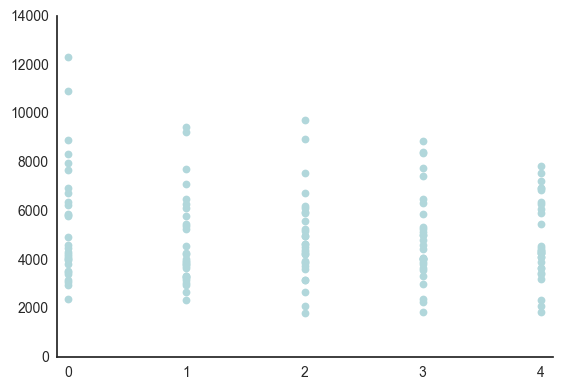

In [244]:
fig, axes = plt.subplots(1, 1)

axes.plot(R['Session'], R['mean rt'], marker='o', linestyle='none')
plt.setp(axes, xlim=[-.1, 4.1])
sns.despine()

stats.linregress(R['Session'], R['mean rt'])

# opening moves